# Explore here

   duration_ms          name  popularity
0       238640         Creep          86
1       229120  No Surprises          83
2       264066  Karma Police          79


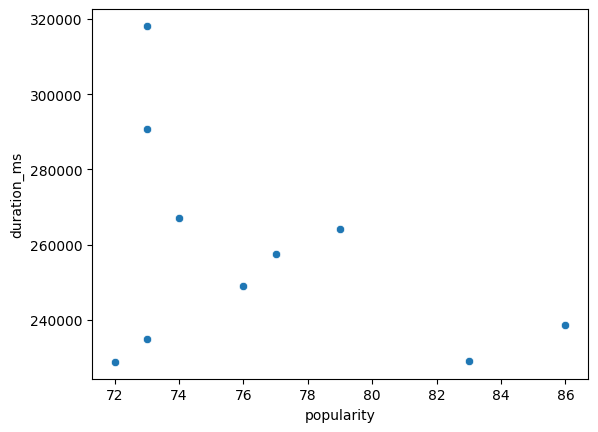

In [10]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib as plt

# load the .env file variables
load_dotenv()
import os

client_id = os.environ.get("SPOTIPY_CLIENT_ID")
client_secret = os.environ.get("SPOTIPY_CLIENT_SECRET")

# artist spotify link https://open.spotify.com/intl-es/artist/4Z8W4fKeB5YxbusRsdQVPb
ARTIST_ID = '4Z8W4fKeB5YxbusRsdQVPb'

radioH_uri = 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
client_secret = client_secret))

results = spotify.artist_top_tracks(radioH_uri)
tracks = results["tracks"]
data = pd.DataFrame(tracks)
columns = data.columns
columns_to_delete = ['album', 'artists', 'disc_number', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'is_playable', 'preview_url', 'track_number', 'type', 'uri']
data_clean = data.drop(columns=columns_to_delete)
df_sorted = data_clean.sort_values(by='popularity')
print(data_clean.head(3))

scatter_plot = sns.scatterplot(data = df_sorted, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")



CONCLUSION: Es evidente que no hay ninguna relacion entre la duracion de los tracks y su popularidad